# Задание на coursera #

## Размер случайного леса ##

Цель:
* работать со случайным лесом — одним из наиболее распространенных семейств алгоритмов
* решать с его помощью задачи регрессии
* подбирать параметры случайного леса

**Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.**

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [7]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1**

In [8]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Разделите содержимое файлов на признаки и целевую переменную.** 

In [16]:
X = data.drop('Rings', axis = 1)
y = data.Rings

**Обучите случайный лес. Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам**

In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
for n in range(1, 51):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    score = cross_val_score(model, X, y, cv=cv, scoring="r2").mean()
    scores.append(score)

**Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52.**

In [19]:
for n, score in enumerate(scores):
    if score > 0.52:
        print(n+1)
        break

21


**Обратите внимание на изменение качества по мере роста числа деревьев**

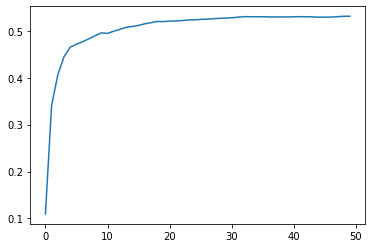

In [20]:
pd.Series(scores).plot()